<u><b>Election Data Project - Polls and Donors</u></b>

This Data Project will be looking at data from the 2016 general election.

In this project we will analyze two datasets. 

We will first analyze the results of aggregated poll data and answer the following questions:
    
    1.) Who was being polled and what was their party affiliation?
    2.) Did the poll results favor a specific candidate?
    3.) How do undecided voters effect the poll?
    4.) Can we account for the undecided voters?
    5.) How did voter sentiment change over time?
    6.) Can we see an effect in the polls from the debates?


In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

The data for the polls will be obtained from HuffPost Pollster.

In [3]:
# Used to grab data from the web via HTTP
import requests

# Use StringIO to work with the csv file (df.read())
from io import StringIO

In [16]:
# The url link for the general election poll data.
url = 'https://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv'

# Use requests to get the information in text form
source = requests.get(url).text

# Use StringIO to avoid an IO error with pandas
poll_data = StringIO(source)

In [17]:
poll_df = pd.read_csv(poll_data)

In [18]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                1522 non-null   object 
 1   Start Date              1522 non-null   object 
 2   End Date                1522 non-null   object 
 3   Entry Date/Time (ET)    1522 non-null   object 
 4   Number of Observations  1013 non-null   float64
 5   Population              1522 non-null   object 
 6   Mode                    1522 non-null   object 
 7   Trump                   1522 non-null   float64
 8   Clinton                 1522 non-null   float64
 9   Other                   1098 non-null   float64
 10  Undecided               1460 non-null   float64
 11  Pollster URL            1522 non-null   object 
 12  Source URL              1522 non-null   object 
 13  Partisan                1522 non-null   object 
 14  Affiliation             1522 non-null   

In [19]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


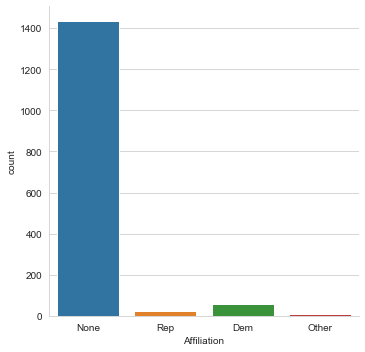

In [22]:
# Quick visualization on the affiliation of the pollsters
sns.catplot('Affiliation', data=poll_df, kind='count')

Most of the polls have no Affiliation - strong neutrality. More Democratic affiliation for polls than Republicans.

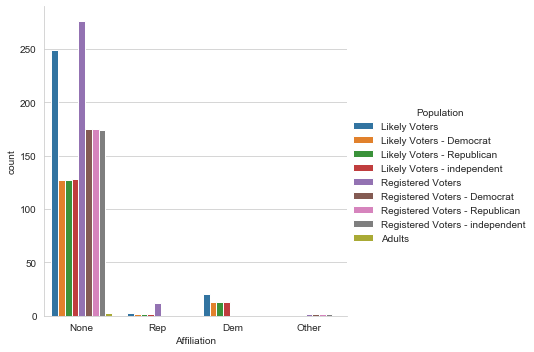

In [23]:
# Visualization of Population (Adults, Likely Voters, LV -R, Reg V...)
sns.catplot('Affiliation', data=poll_df, hue='Population', kind='count')

There is a very strong showing of Likely Voters and Registered Voters that have no marked affiliation.

This should hopefully be somewhat indicative of the population.

In [24]:
# Let's take a look at the averages of polls
avg = pd.DataFrame(poll_df.mean())

avg.drop('Number of Observations',  axis=0, inplace=True)

Dropping the Number of Observations to just look at Trump or Clinton obsv.

In [25]:
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations', axis=0, inplace=True)

In [26]:
std.head()

,0
Trump,23.566390
Clinton,25.298731
Other,5.009533
Undecided,6.253118
Question Iteration,0.412214


In [27]:
avg.head()

,0
Trump,40.643890
Clinton,42.733903
Other,5.806011
Undecided,9.315068
Question Iteration,1.216820


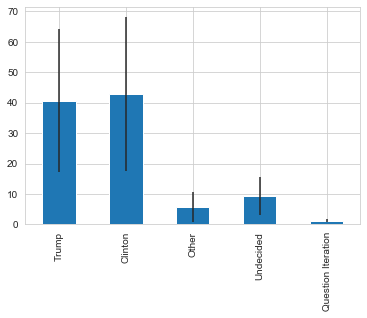

In [28]:
# Setting the y-error to be the std we just calculated
avg.plot(yerr=std, kind='bar', legend=False)

The Average Sentiment of all of the polls. It looked like, on average, Clinton had the slightly higher sentiment. 
    The Undecided will be a huge factor.

In [29]:
poll_avg = pd.concat([avg,std], axis=1)

In [31]:
poll_avg.columns = ['Average', 'STD']

In [32]:
poll_avg

,Average,STD
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Other,5.806011,5.009533
Undecided,9.315068,6.253118
Question Iteration,1.216820,0.412214


It looks like a very tight race.

If we assumed a even split of Undecided Voters (since they should vote 1 candidate either way), we should be able to get an unbiased estimate.

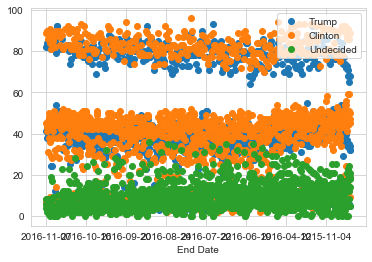

In [33]:
# First, let's plot the favor of Trump, Clinton, Undecided voters through time
poll_df.plot(x='End Date', y=['Trump', 'Clinton', 'Undecided'], 
             linestyle='', marker='o')

<b> TIME ANALYSIS </b> of voter sentiment for Trump, Clinton, or Undecided Voters

In [34]:
# Plot DIFFERENCE versus time
from datetime import datetime

In [35]:
poll_df['Difference'] = (poll_df.Trump - poll_df.Clinton)/100

In [36]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.04
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.83
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.75
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.05
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1,0.02


Difference column is Trump - Clinton.

    A positive difference indicates a leaning towards Trump in the polls.
    
    A negative difference indicates a leaning towards Clinton in the polls.

In [37]:
poll_df = poll_df.groupby(['Start Date'], as_index=False).mean()
# as_index=False keeps original indexes before the groupby.

poll_df.head()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
0,2015-05-19,1046.00,34.25,48.75,2.5,14.00,1.0,-0.1450
1,2015-06-20,420.75,35.00,47.25,NaN,17.75,1.0,-0.1225
2,2015-06-21,1005.00,34.00,51.00,3.0,12.00,1.0,-0.1700
3,2015-06-26,890.00,36.75,57.00,6.0,0.00,1.0,-0.2025
4,2015-07-09,499.25,35.25,49.50,NaN,16.00,1.0,-0.1425


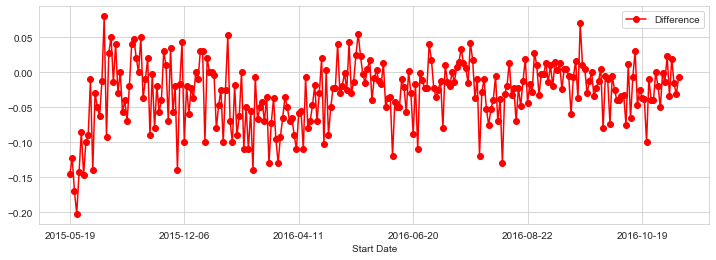

In [38]:
poll_df.plot('Start Date', 'Difference', figsize=(12,4), marker='o',
            linestyle='-', color='red')

Percent Change of Voter Sentiment over time.

It looks like Clinton was favored  heavily at the beginning of the year, but the general sentiment shifted back slightly towards Trump, with brief spikes in favor to Clinton throughout. 

Generally, it looks like the sentiment was favoring Clinton.

Let's take a look at how the <b>Debates</b> may have factored into Voter Sentiment.

In [43]:
# The Debates took place in October of 2015.

row_in = 0
xlimit = []

# Cycle through poll_df indices until the date reachers October.
for date in poll_df['Start Date']:
    if date[0:7] == '2015-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1


#The Indexes that account for the dates in October 2015
print(min(xlimit))
print(max(xlimit))

28
40


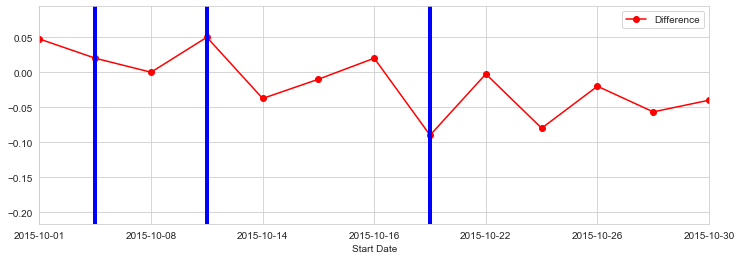

In [59]:
poll_df.plot('Start Date', 'Difference', figsize=(12,4), marker='o',
            linestyle='-', color='red', xlim=(28, 40))

# Oct 4 VP Debate; Oct 1 is at index 28 but due to not enough data points..
plt.axvline(x=28+1, linewidth=4, color='blue')

# Oct 9 2nd P Debate
plt.axvline(x=28+3, linewidth=4, color='blue')

# Oct 19 Final P Debate
plt.axvline(x=28+7, linewidth=4, color='blue')

We can observe the following:

    1.) After the VP Debate, sentiment for Clinton slowed and swung towards Trump
    2.) After the 2nd Debate, sentiment swung in favor for Clinton, only to be redirected in Trumps favor again.
    3.) After the Final Debate, sentiment immediately swung in Trump's favor, and pivoted back and forth.

Moving onto the next dataset. 2012 Election Donor Data Set.

The Donor Dataset:https://www.dropbox.com/s/l29oppon2veaq4n/Election_Donor_Data.csv?dl=0

The questions we will try to answer while looking at the Donor Data Set:
    
    1.) How much was donated and what was the average donation?
    2.) How did the donations differ between candidates?
    3.) How did the donations differ between Democrats and Republicans?
    4.) What were the demographics of the donors?
    5.) Is there a pattern to donation amounts?

In [60]:
# Getting the csv, setting it as our df
donor_df = pd.read_csv('Election_Donor_Data.csv')

C:\Users\teddy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [61]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [62]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [63]:
# Top donation amounts?
donor_df['contb_receipt_amt'].value_counts()

100.00    178188
50.00     137584
25.00     110345
250.00     91182
500.00     57984
           ...  
97.15          1
122.32         1
188.65         1
122.40         1
132.12         1
Name: contb_receipt_amt, Length: 8079, dtype: int64

The most common donation was $100 with 178,188 occurences.

In [64]:
# Mean donation
don_mean = donor_df['contb_receipt_amt'].mean()

# Standard deviation
don_std = donor_df['contb_receipt_amt'].std()

In [65]:
print('The average donation was %.2f with a std %.2f' %(don_mean,don_std))

The average donation was 298.24 with a std 3749.67


In [67]:
top_donor = donor_df['contb_receipt_amt'].copy()

top_donor.sort_values()

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 1001731, dtype: float64

Negatives were for refunds in the contribution receipts amount.

Let's get rid of the negative refund amounts so the data makes sense.

In [68]:
top_donor = top_donor[top_donor > 0]

In [69]:
top_donor.sort_values()

335573          0.01
335407          0.01
335352          0.01
324596          0.01
329896          0.01
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 991475, dtype: float64

In [71]:
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

Note all of the top donations are at rounded values. This makes sense intuitively.

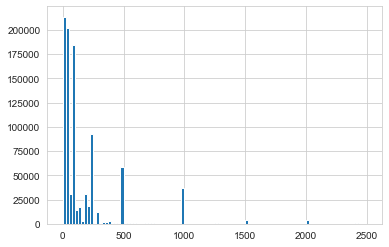

In [72]:
# Looking at all donation amounts from 0 to 2500
com_don = top_donor[top_donor < 2500]

com_don.hist(bins=100)

Notice there are peaks that occur at round values.

Can we seperate donations by Party?

In [73]:
candidates = donor_df.cand_nm.unique()

candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [74]:
# Dictionary of party affiliation for each candidate
party_map = {'Bachmann, Michelle': 'Republican',
            'Cain, Herman': 'Republican',
            'Gingrich, Newt': 'Republican',
            'Huntsman, Jon': 'Republican',
            'Johnson, Gary Earl': 'Republican',
            'McCotter, Thaddeus G': 'Republican',
            'Obama, Barack': 'Democrat',
            'Paul, Ron': 'Republican',
            'Pawlenty, Timothy': 'Republican',
            'Perry, Rick': 'Republican',
            "Roemer, Charles E. 'Buddy' III": 'Republican',
            'Romney, Mitt': 'Republican',
            'Santorum, Rick': 'Republican'}

# Map the party with the candidate
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [77]:
# Getting rid of negative donation refunds
donor_df = donor_df[donor_df.contb_receipt_amt > 0]

In [78]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [79]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [80]:
# The sum of all candidates contribution amounts.
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [83]:
# Let's consider a VERBAL organized visualization.
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

i = 0

for don in cand_amount:
    print('The candidate %s raise %.0f dollars' %(cand_amount.index[i], don))
    print('\n')
    i += 1

The candidate Bachmann, Michelle raise 2711439 dollars


The candidate Cain, Herman raise 7101082 dollars


The candidate Gingrich, Newt raise 12832770 dollars


The candidate Huntsman, Jon raise 3330373 dollars


The candidate Johnson, Gary Earl raise 566962 dollars


The candidate McCotter, Thaddeus G raise 39030 dollars


The candidate Obama, Barack raise 135877427 dollars


The candidate Paul, Ron raise 21009620 dollars


The candidate Pawlenty, Timothy raise 6004819 dollars


The candidate Perry, Rick raise 20305754 dollars


The candidate Roemer, Charles E. 'Buddy' III raise 373010 dollars


The candidate Romney, Mitt raise 88335908 dollars


The candidate Santorum, Rick raise 11043159 dollars




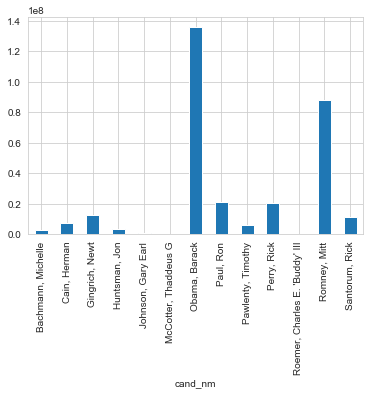

In [84]:
# Let's PLOT a simple visualization of the donor amount for the candidates.
cand_amount.plot(kind='bar')

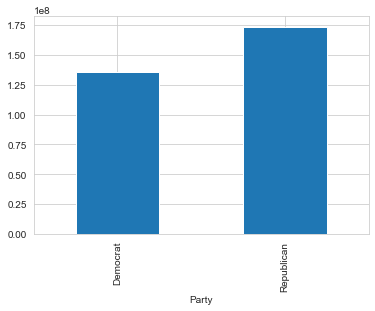

In [85]:
# Let's compare OBAMA vs the sum of Republicans (since Obama is the only D)
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

Here, Democrat is literally just Obama since he is the only Democrat.

Let us take a look at the donations and where they came from based on occupation.

In [86]:
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                    index='contbr_occupation',
                                    columns='Party',
                                    aggfunc='sum')

In [87]:
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [88]:
occupation_df.shape

(45067, 2)

This DataFrame is huge! There are over 45,000 different occupations. We should not display this in a static format because it would be visually informative.

In [89]:
# Let's see if we can strictly look at occupations that donated > $1m
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

In [90]:
occupation_df.shape

(31, 2)

32 groups of occupations! We can work with this in a visually informative way.

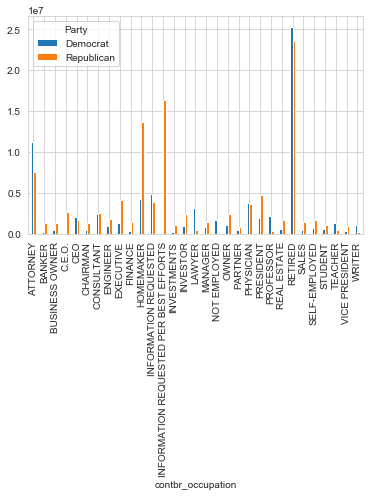

In [91]:
occupation_df.plot(kind='bar')

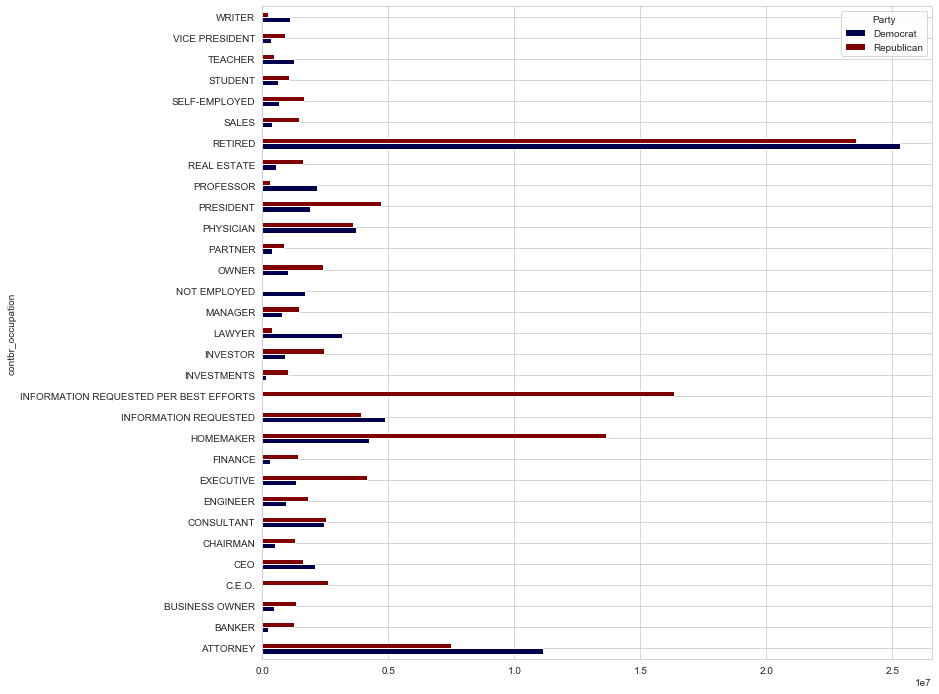

In [92]:
# Let's use a horizontal bargraph
occupation_df.plot(kind='barh', figsize=(12,12), cmap='seismic')

We can notice two values that need to be removed because they are not actual occupations.

C.E.O. amd CEO have also been seperated.

In [93]:
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS', 
                    'INFORMATION REQUESTED'], axis=0, inplace=True)

In [97]:
# Now combine C.E.O. and CEO
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']

occupation_df.drop('C.E.O.', inplace=True)

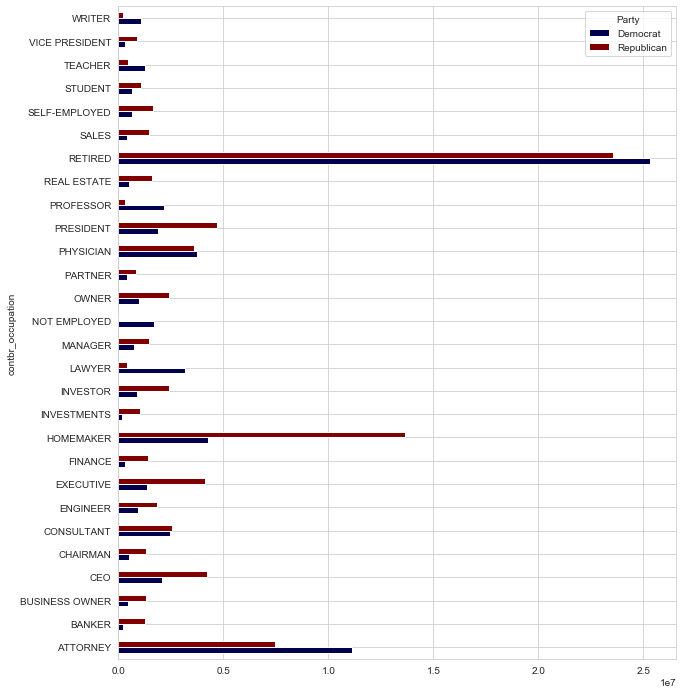

In [98]:
occupation_df.plot(kind='barh', figsize=(10,12), cmap='seismic')

We can now easily observe which most-active-in-donating occupations tend to lean in which political direction.